# Name: Swati


# Task 2 - Prediction using Supervised ML


## Importing all required libraries.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing data

In [111]:
#Reading of data
url="http://bit.ly/w-data"
table= pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## To see first 10 rows

In [112]:
table.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## To know no. of rows & columns

In [113]:
table.shape

(25, 2)

##### To see full table data

In [114]:
table.head(25)

# Using 25 since the table has total 25 rows as seen above

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Generating descriptive statistics
### To see statistical details of the dataset

In [115]:
table.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking missing or Null values

In [116]:
table.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data plotting

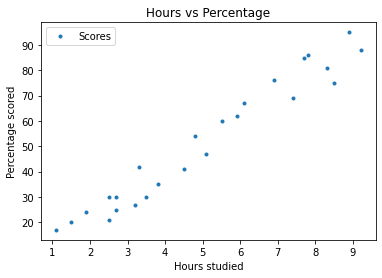

In [117]:
table.plot(x='Hours',y='Scores',style='.')
# the character/special character used in style represents the type of symbol used for the plotting of graph
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

### Dividing data into attributes and labels

In [118]:
x=table.iloc[:, :-1].values
y=table.iloc[:, 1].values

### Spliting data into training sets and test sets

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


##### Displaying x & y training set and test set values


In [120]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [121]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [122]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [123]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Training the algorithm

In [124]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print("Training completed")

Training completed


### Plotting the regression line

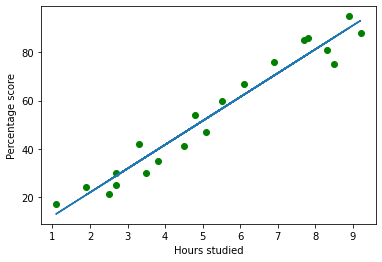

In [125]:
# Plotting for train data
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,reg.predict(x_train))
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

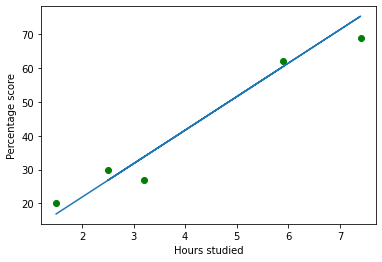

In [126]:
# Plotting for test data
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,reg.predict(x_test))
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

### Making Predictions

#### Now we have trained our algorithm, so it's time to make prediction

In [127]:
print("Training score : ",(reg.score(x_train,y_train)))
print("Test score : ",(reg.score(x_test,y_test)))

Training score :  0.9515510725211552
Test score :  0.9454906892105356


In [128]:
y_pred=reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing actual & predicted data

In [129]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


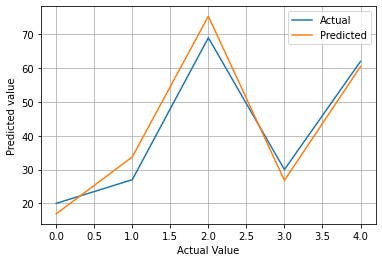

In [130]:
# Graph between actual and predicted data

data.plot()
plt.grid()
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
plt.show()

## Que. - What will be predicted score if a student studies for 9.25 hrs/day?

### Solution

In [131]:
hours= 9.25
own_pred=reg.predict([[hours]])
print("Number of Hours studied : ", format(hours))
print("Predicted score : ",format(own_pred[0]))

Number of Hours studied :  9.25
Predicted score :  93.69173248737538


## Model accuracy evaluation

####  This step is for evaluating performance of the algorithm.
#### (Here we have chosen mean square error for evaluating the performance).

In [132]:
from sklearn import metrics
print('Mean absolute error (MAE) : ', metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error (MAE) :  4.183859899002975


## Conclusion

### Hence, by the above prediction we can say that the predicted score of a student if he/she studies for 9.25 hrs/day is 93.6917 with an error difference of 4.1838.